### Quick View 

Here are some codes for data exploratory, visualization , ... 

In [24]:
# Import required modules 

import numpy as np 
import matplotlib.pyplot as plt

#---------import watex modules ---------------------------------------------------------------
from watex.view import ExPlot, QuickPlot, TPlot
from watex.datasets import fetch_data , load_bagoue , load_edis 
from watex.transformers import StratifiedWithCategoryAdder
 
# ----------------end of import --------------------------------------------------------------

In [15]:
#### Data Exploratory 
#---------------------------------------------------------------------------------------------
# Exploratory plot for data analysis 

# `ExPlot` is a shadow class. Explore data is needed to create a model since 
# it gives a feel for the data and also at great excuses to meet and discuss 
# issues with business units that controls the data. `ExPlot` methods i.e. 
# return an instancied object that inherits from :class:`watex.property.Baseplots`
# ABC (Abstract Base Class) for visualization
# ----------------------------------------------------------------------------------------------

# Give some data exploration tricks. Here are some few examples for analysis and visualization 


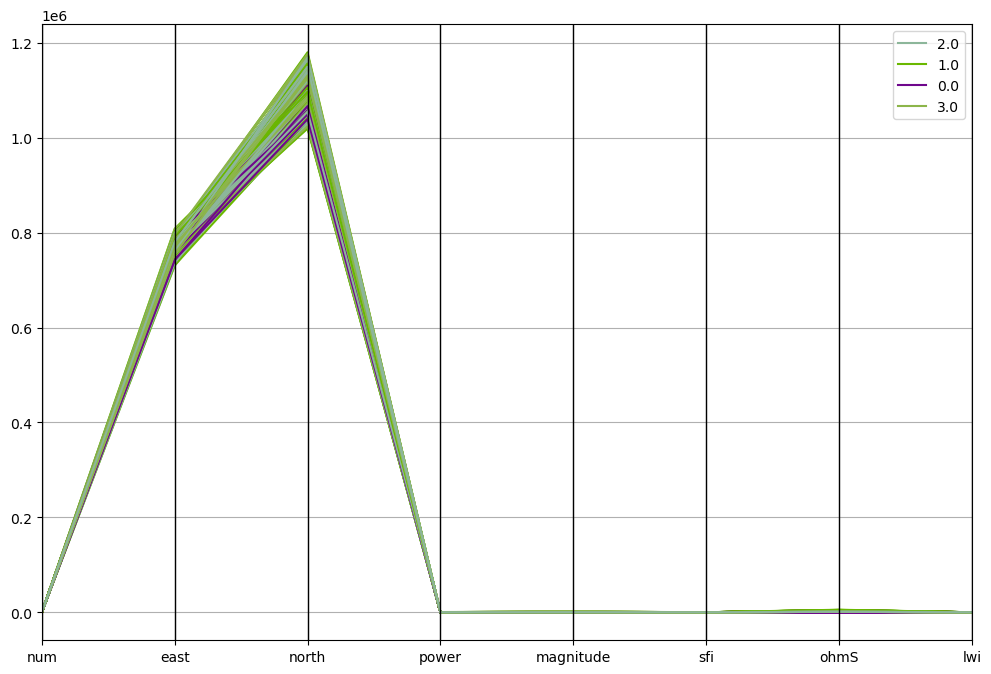

<'ExPlot':xname=None, yname=None , tname='flow'>

In [8]:
# Use parallel coordinates in multivariates for clustering visualization  
# (Need yelowbrick to be installed  if 'pkg' argument is set to 'yb')
data =fetch_data('original data').get('data=dfy1')
p = ExPlot (tname ='flow').fit(data)
p.plotparallelcoords(pkg='pd')

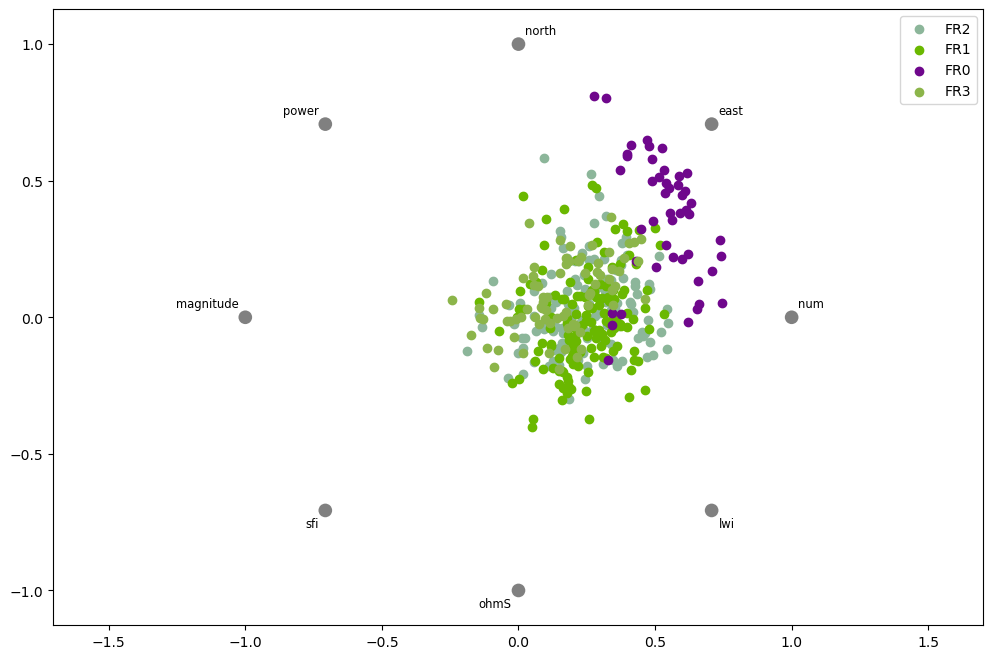

<'ExPlot':xname=None, yname=None , tname='flow'>

In [9]:
# plot each sample on circle or square, with features on the  circonference to vizualize separateky between target.  

data2 = fetch_data('bagoue original').get('data=dfy2')
p = ExPlot(tname ='flow').fit(data2)
p.plotradviz(classes= None, pkg='pd' )

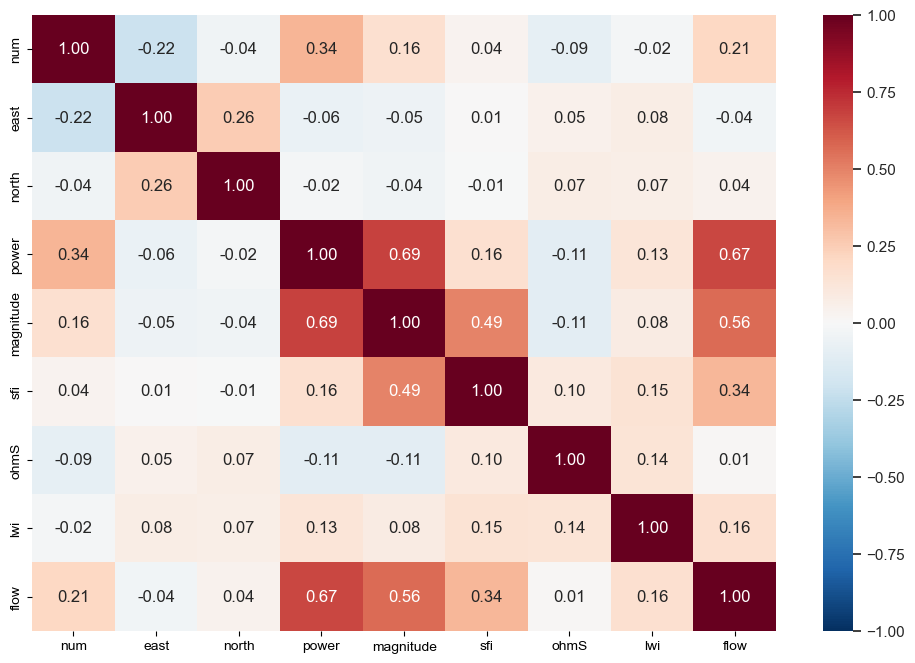

<'ExPlot':xname=None, yname=None , tname='flow'>

In [12]:
#Create pairwize comparizons bteween features. 
# Plots shows a ['pearson'|'spearman'|'covariance'] correlation. 
data = fetch_data ('bagoue original').get('data=dfy1') 
p= ExPlot(tname='flow').fit(data)
p.plotpairwisecomparison(fmt='.2f', corr='spearman',
                                     annot=True, 
                                     cmap='RdBu_r', 
                                     vmin=-1, 
                                     vmax=1 )


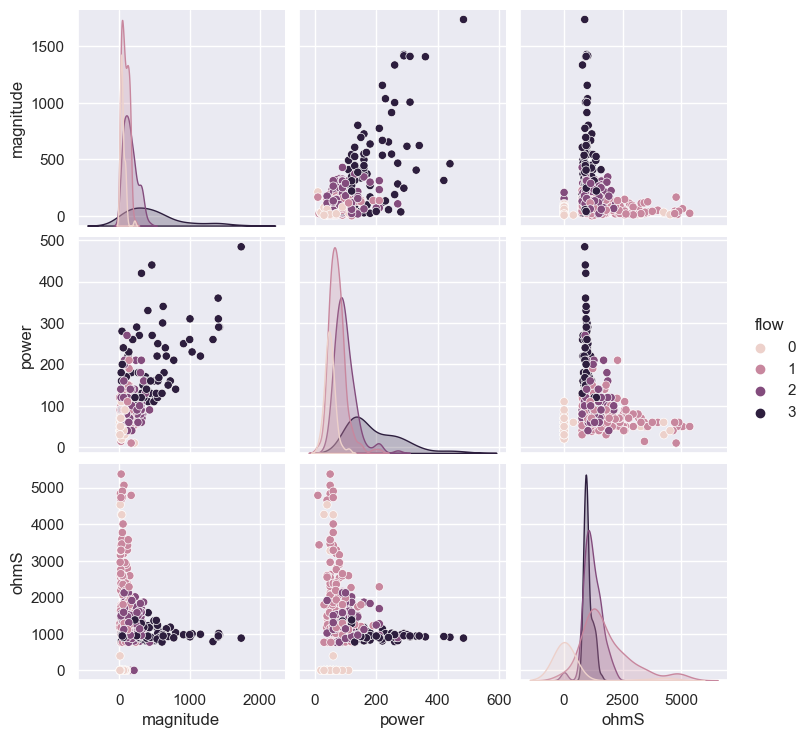

<'ExPlot':xname=None, yname=None , tname='flow'>

In [13]:
# Create a pair grid. 
    # Is a matrix of columns and kernel density estimations. To color by a  columns from a dataframe, use 'hue' parameter. 
    
data = fetch_data ('bagoue original').get('data=dfy1') 
p= ExPlot(tname='flow').fit(data)
p.plotpairgrid (vars = ['magnitude', 'power', 'ohmS'] )
    

In [16]:
#### QuickPlot  quick for features analysis 
# ------------------------------------------------------------------------------
# Special class dealing with analysis modules for quick diagrams, 
# histograms and bar visualization.

# Originally, it was designed for the flow rate prediction, however, it still 
# works with any other dataset by following the parameters details.
# -----------------------------------------------------------------------------
# Here to give some quick features analysis 

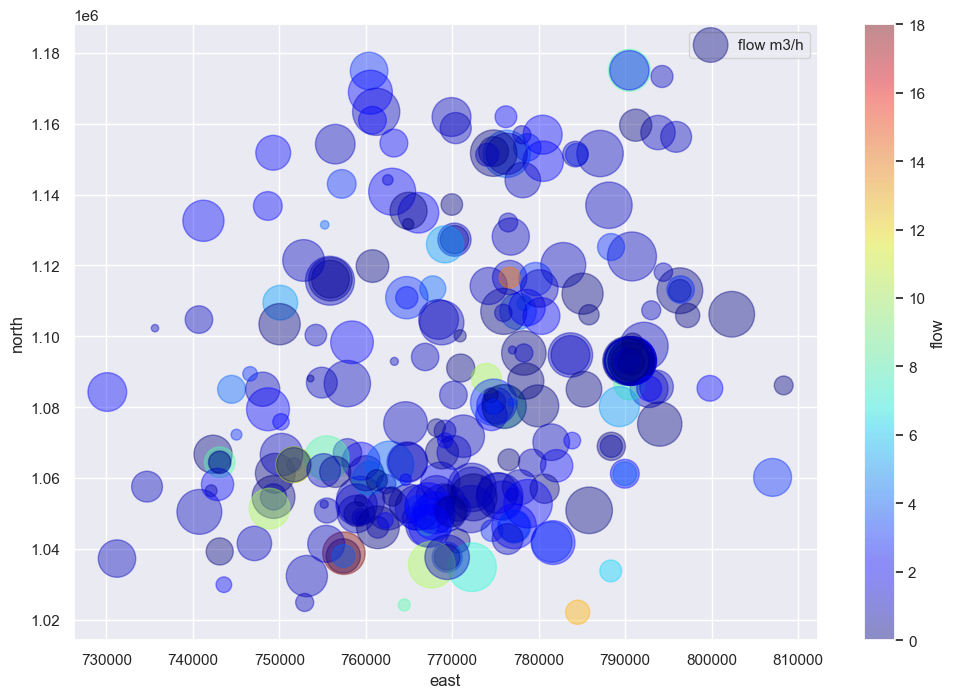

QuickPlot(savefig= None, fig_num= 1, fig_size= (12, 8), ... , classes= None, tname= None, mapflow= False)

In [20]:
# Create a plot  of naive visualization  
# ----------------------------------------------


df = load_bagoue ().frame
stratifiedNumObj= StratifiedWithCategoryAdder('flow')
strat_train_set , *_= stratifiedNumObj.fit_transform(X=df) 
pd_kws ={'alpha': 0.4, 
         'label': 'flow m3/h', 
         'c':'flow', 
         'cmap':plt.get_cmap('jet'), 
         'colorbar':True}
qkObj=QuickPlot(fs=25.)
qkObj.fit(strat_train_set)
qkObj.naiveviz( x= 'east', y='north', **pd_kws) 


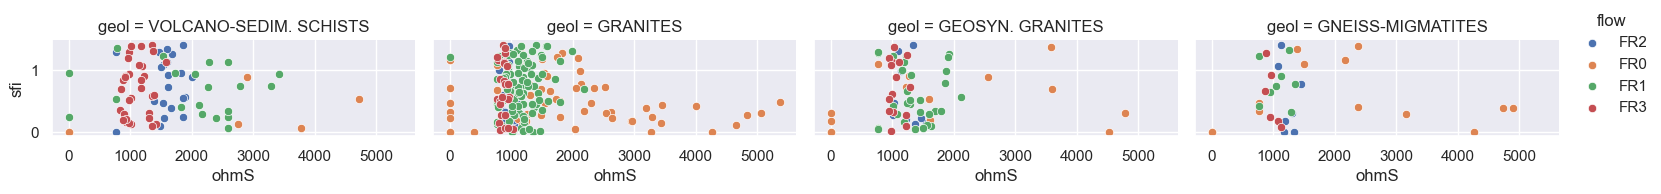

QuickPlot(savefig= None, fig_num= 1, fig_size= (12, 8), ... , classes= None, tname= flow, mapflow= True)

In [21]:
#  Provides the features names at least 04 and discuss with  their distribution. 
        
#         This method maps a dataset onto multiple axes arrayed in a grid of
#         rows and columns that correspond to levels of features in the dataset. 
#         The plots it produces are often called “lattice”, “trellis”, or
#         'small-multiple' graphics. 

data = load_bagoue ().frame 
qkObj = QuickPlot(  leg_kws={'loc':'upper right'},
          fig_title = '`sfi` vs`ohmS|`geol`',
            ) 
qkObj.tname='flow' # target the DC-flow rate prediction dataset
qkObj.mapflow=True  # to hold category FR0, FR1 etc..
qkObj.fit(data) 
sns_pkws={'aspect':2 , 
          "height": 2, 
                  }
map_kws={'edgecolor':"w"}   
qkObj.discussingfeatures(features =['ohmS', 'sfi','geol', 'flow'],
                           map_kws=map_kws,  **sns_pkws
                        )   

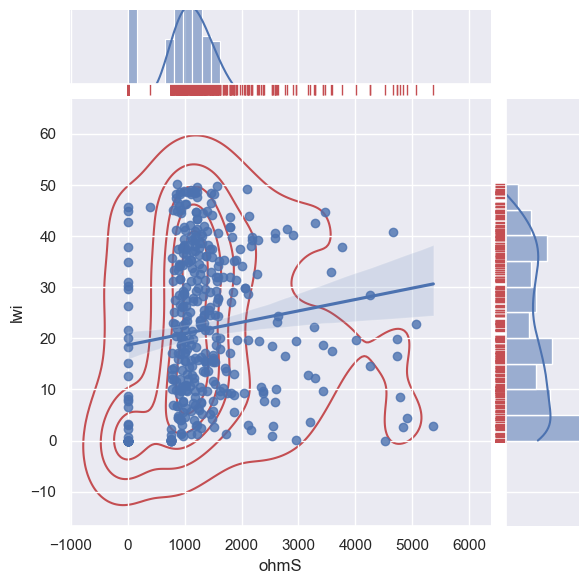

QuickPlot(savefig= None, fig_num= 1, fig_size= (12, 8), ... , classes= None, tname= None, mapflow= False)

In [22]:
# Joint methods allow to visualize correlation of two features. 
# Draw a plot of two features with bivariate and univariate graphs. 
        
data = load_bagoue ().frame
qkObj = QuickPlot( lc='b', sns_style ='darkgrid', 
             fig_title='Quantitative features correlation'
             ).fit(data)  
sns_pkws={
            'kind':'reg' , #'kde', 'hex'
            # "hue": 'flow', 
               }
joinpl_kws={"color": "r", 
                'zorder':0, 'levels':6}
plmarg_kws={'color':"r", 'height':-.15, 'clip_on':False}           
qkObj.joint2features(features=['ohmS', 'lwi'], 
            join_kws=joinpl_kws, marginals_kws=plmarg_kws, 
                     **sns_pkws, 
            )

In [23]:
# #### TPlot  quick for tensor recovered 
# --------------------------------------------------------------------------------
# Tensor plot from EM processing data  

# `TPlot` is a Tensor (Impedances , resistivity and phases ) plot class. 
# Explore SEG ( Society of Exploration Geophysicist ) class data.  Plot recovery 
# tensors. `TPlot` methods returns an instancied object that inherits 
# from :class:`watex.property.Baseplots` ABC (Abstract Base Class) for 
# visualization.
#---------------------------------------------------------------------------------

# Here are some few examples for demonstration. 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
|Data collected =  3      |EDI success. read=  3      |Rate     =  100.0  %|
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<AxesSubplot:title={'center':'Recovered tensor $|Z_{xy}|$'}, xlabel='$Frequency [H_z]$', ylabel='$ App.resistivity \\quad xy \\quad [ \\Omega.m]$'>

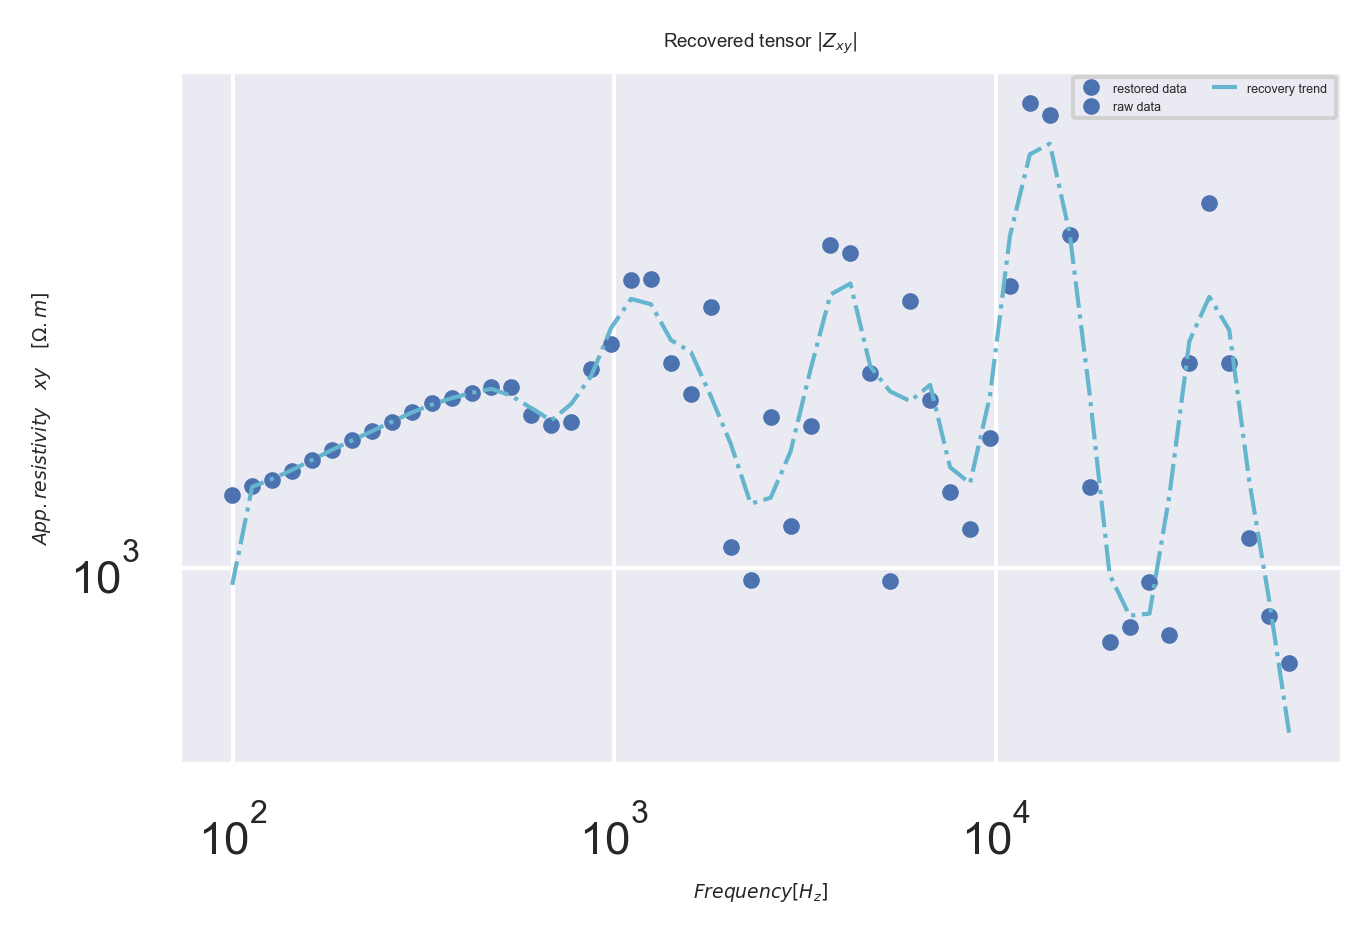

In [25]:
# Plot mutiple site/stations with signal recovery. 

# takes the 03 samples of EDIs 
edi_data = load_edis (return_data= True, samples =3 ) 
TPlot(fig_size =(5, 3)).fit(edi_data).plot_multi_recovery (sites =['S00'], colors =['o', 'ok--'])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
|Data collected =  12     |EDI success. read=  12     |Rate     =  100.0  %|
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


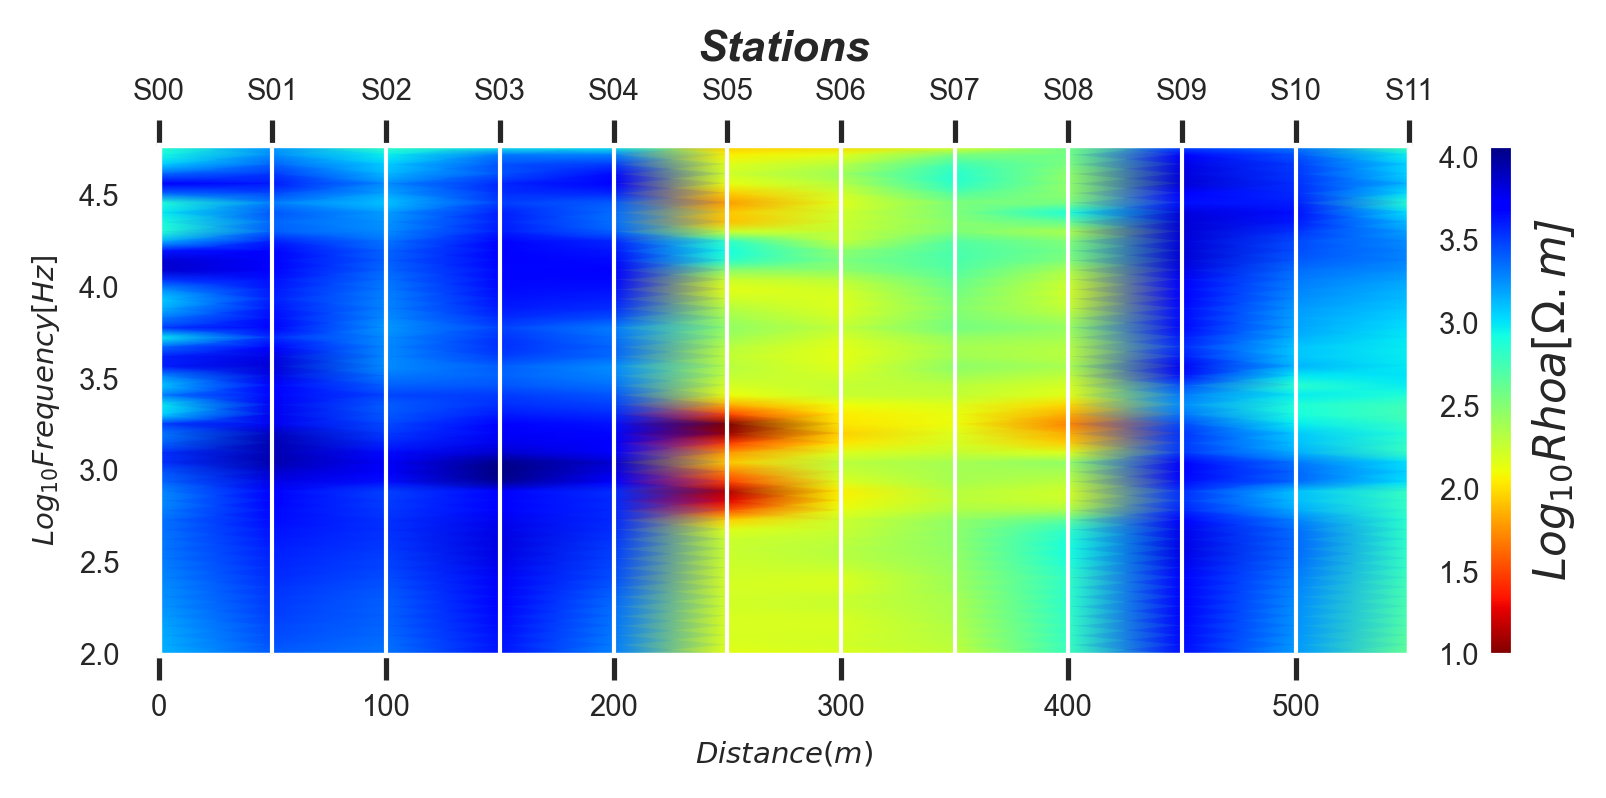

<AxesSubplot:xlabel='$Distance(m)$', ylabel='$Log_{10}Frequency [Hz]$'>

In [26]:
# Plot two dimensional array tensor . 

# get some 12 samples of EDI for demo 
edi_data = load_edis (return_data =True, samples =12 )
# customize plot by adding plot_kws 
plot_kws = dict( ylabel = '$Log_{10}Frequency [Hz]$', 
                    xlabel = '$Distance(m)$', 
                    cb_label = '$Log_{10}Rhoa[\Omega.m$]', 
                    fig_size =(6, 3), 
                    font_size =7. 
                    ) 
t= TPlot(**plot_kws ).fit(edi_data)
# plot recovery2d using the log10 resistivity 
t.plot_tensor2d (to_log10=True)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
|Data collected =  12     |EDI success. read=  12     |Rate     =  100.0  %|
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


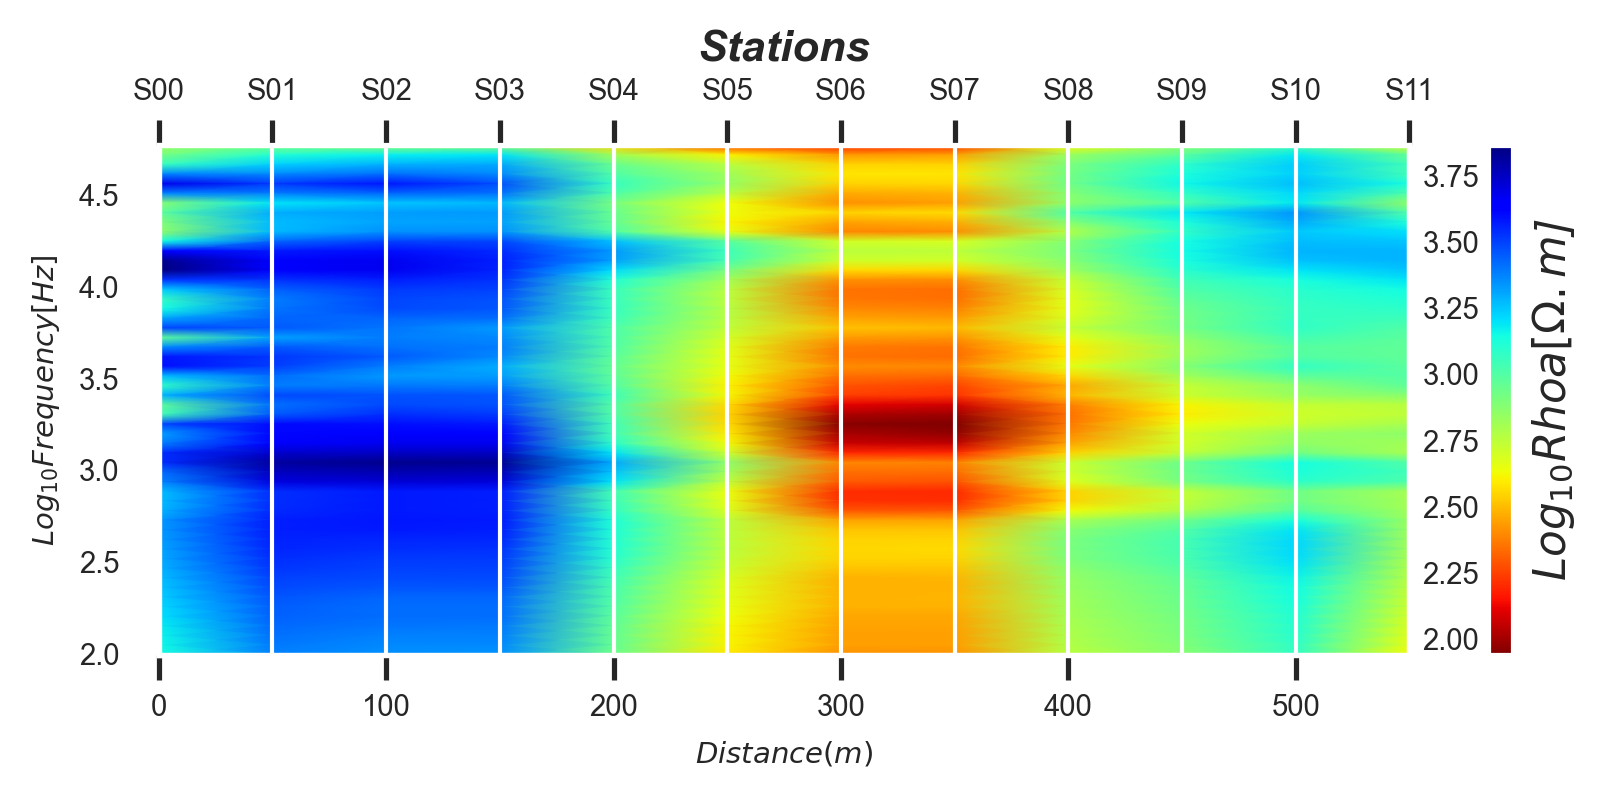

<AxesSubplot:xlabel='$Distance(m)$', ylabel='$Log_{10}Frequency [Hz]$'>

In [28]:
# Plot filtered tensors 
 
# take the 12 samples of EDI and plot the corrected tensors 
edi_data = load_edis (return_data =True, samples =12 )
# customize plot by adding plot_kws 
plot_kws = dict( ylabel = '$Log_{10}Frequency [Hz]$', 
                    xlabel = '$Distance(m)$', 
                    cb_label = '$Log_{10}Rhoa[\Omega.m$]', 
                    fig_size =(6, 3), 
                    font_size =7. 
                    ) 
t= TPlot(**plot_kws ).fit(edi_data)
# plot filtered tensor using the log10 resistivity 
t.plot_ctensor2d (to_log10=True)